# 1D Schrodinger numerical simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.numerical_solver import Solver
from src.animation import create_animation

Parameter initialization

In [2]:
# Choose parameters and create the solver
total_length = 2.0
total_time = 0.2
num_space_steps = 251
num_time_steps = 1500
solver = Solver(total_length, num_space_steps, total_time, num_time_steps)

Potential $V(x)$

In [3]:
# Define the potential
x = np.linspace(0,total_length,num_space_steps-2)
potential = np.zeros(num_space_steps-2)
potential0 = 300
# Define a region of the potential
potential[int(0.85/(total_length/(num_space_steps-2))):int(1.15/(total_length/(num_space_steps-2)))] = potential0

Initial condition $\Psi(x,0)$

In [4]:
# Initial condition
mean = total_length/6
sigma = 0.05
k0 = 30
# Gaussian wave packet with a specified mean, sigma, and k0
initial_condition = np.exp(1j * k0 * x) * np.exp(-(x - mean)**2 / (2 * sigma**2))
initial_condition /= np.sqrt(np.sum(np.absolute(initial_condition)**2) * total_length/num_space_steps)

Visualize initial condition

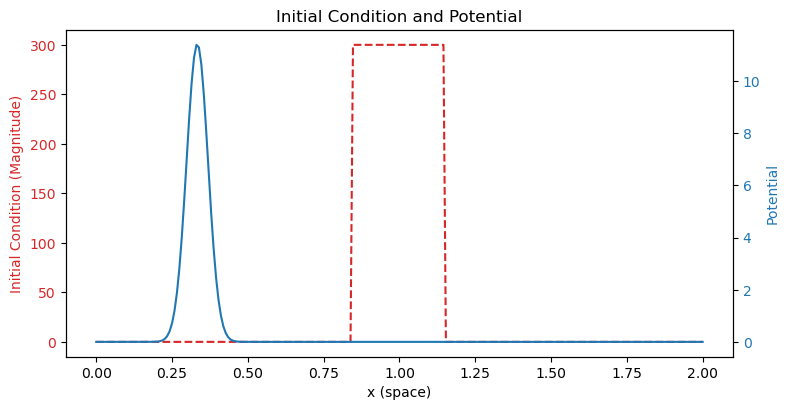

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4))

# Initial condition
color = 'tab:red'
ax1.set_xlabel('x (space)')
ax1.set_ylabel('Initial Condition (Magnitude)', color=color)
ax1.plot(x, potential, '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Potential
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Potential', color=color)
ax2.plot(x, np.absolute(initial_condition)**2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Initial Condition and Potential')
plt.show()

Solve

In [6]:
# Compute the solution
solution = solver.solve(initial_condition, potential, True)

Using GPU: ID 0
Evaluating iteration matrix
Solving numerical scheme
Returning solution


Create the animation

In [7]:
# Create the animation
wave = np.absolute(solution)**2
create_animation(x, wave, potential)

gif: ./output_gifs/schrodinger.gif

![schrodingerPath](./output_gifs/schrodinger.gif "schrodinger")